For each of the following questions, formulate a null and alternative hypothesis 
(be as specific as you can be), then give an example of what a true positive, 
true negative, type I and type II errors would look like. Note that some of 
the questions are intentionally phrased in a vague way. It is your job to reword 
these as more precise questions that could be tested.


1
Has the network latency gone up since we switched internet service providers?

H0 = the network latency has not gone up since we switched ISP
H1 = the network latency has gone up since we switched ISP

True positive:
the network latency has increased, and our test also says that the latency has increased

True negative:
the network latency has not increased, and our test also says that the latency has not increased

Type I error = false positive:
the network latency has not increased, but our test says that the latency has increased

Type II error = false negative:
the network latency has increased, but our test says that the latency has not increased

2
Is the website redesign any good?

H0 = the website redesign is good
H1 = the website redesign is not good

True positive:
the website redesign is not good, and our test says that the website redesign is not good

True negative:
the website redesign is good, and our test says that the website redesign is good

Type I error = false positive:
the website redesign is good, and our test says that the website redesign is not good

Type II error = false negative:
the website redesign is not good, and our test says that the website redesign is good


3
Is our television ad driving more sales?

H0 = the television ad is not driving more sales
H1 = the television ad is driving more sales

True positive:
the television ad is driving more sales, and our test says that the television ad is driving more sales

True negative:
the television ad is not driving more sales, and our test says that the television ad is not driving more sales

Type I error = false positive:
the television ad is not driving more sales, and our test says that the television ad is driving more sales

Type II error = false negative:
the television ad is driving more sales, and our test says that the television ad is not driving more sales

In [1]:
from math import sqrt
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from pydataset import data

4
Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 
A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 
A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 
Use a .05 level of significance.

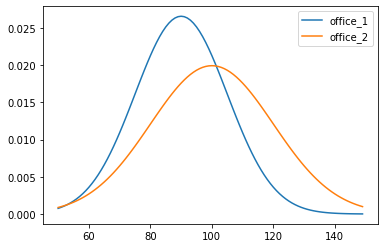

In [11]:
#4
# we are comparing the average time it takes each group to make a sale

# o1 = 40 sales in 90 +- 15 days
# o2 = 50 sales in 100 +- 20 days

x = np.arange(50, 150)
y1 = stats.norm(90, 15).pdf(x)
y2 = stats.norm(100, 20).pdf(x)

plt.plot(x, y1, label = 'office_1')
plt.plot(x, y2, label = 'office_2')

plt.legend()

In [10]:
#4
# H0: the time to sell at o1 is = to the time at o2
# H1: the time to sell at o1 is != to the time at o2
alpha = 0.05

mu1 = 90
sd1 = 15
n1 = 40

mu2 = 100
sd2 = 20
n2 = 50

t, p = stats.ttest_ind_from_stats(mu1, sd1, n1, mu2, sd2, n2, equal_var = False)
t, p, alpha
# negative t stat indicates that office 1 has lower mean than office 2

(-2.7091418459143854, 0.00811206270346016, 0.05)

In [18]:
#5
# Load the mpg dataset and use it to answer the following questions:

# Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
df = data('mpg')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [16]:
df.year.value_counts()

1999    117
2008    117
Name: year, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [20]:
df['avg_eff'] = stats.hmean(df[['cty', 'hwy']], axis = 1)
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_eff
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524


In [21]:
cars_2008 = df[df.year == 2008].avg_eff
cars_2008.head()

3     24.313725
4     24.705882
7     21.600000
10    23.333333
11    22.304348
Name: avg_eff, dtype: float64

In [22]:
cars_1999 = df[df.year == 1999].avg_eff
cars_1999.head()

1    22.212766
2    24.360000
5    19.809524
6    21.272727
8    21.272727
Name: avg_eff, dtype: float64

<AxesSubplot:>

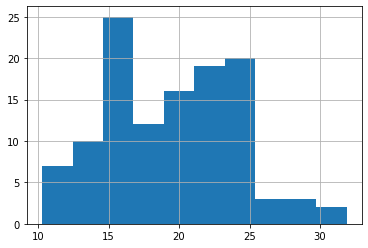

In [23]:
cars_2008.hist()

<AxesSubplot:>

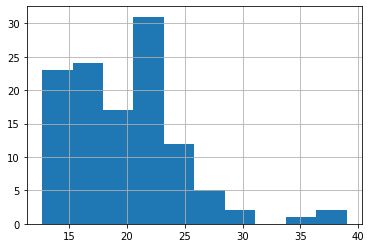

In [24]:
cars_1999.hist()

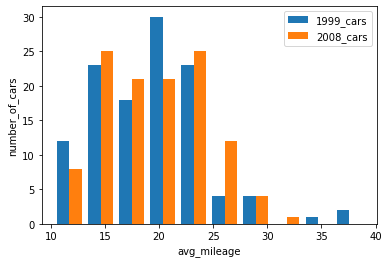

In [25]:
plt.hist([cars_1999, cars_2008], label = ['1999_cars', '2008_cars'])
plt.xlabel('avg_mileage')
plt.ylabel('number_of_cars')
plt.legend()

In [26]:
# H0: 1999 and 2008 cars have = mileage
# H1: 1999 and 2008 cars have != mileage

cars_1999.var(), cars_2008.var()

(25.850396545865912, 22.550836772260343)

In [27]:
stats.levene(cars_1999, cars_2008)
# tests shows that variance is homogeneous

LeveneResult(statistic=0.031071867429515194, pvalue=0.8602339200830025)

In [28]:
#5
alpha = 0.05
t, p = stats.ttest_ind(cars_1999, cars_2008)
t, p, alpha

# p is not < 0.05
# we accept H0
# mileage is the same

(0.3011962975077886, 0.7635345888327115, 0.05)

<AxesSubplot:>

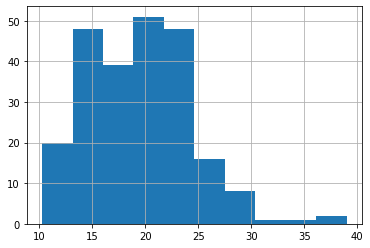

In [34]:
#5
# Are compact cars more fuel-efficient than the average car?

#df['is_compact'] = df['class'] == 'compact'

all_cars = df.avg_eff
all_cars.hist()

<AxesSubplot:>

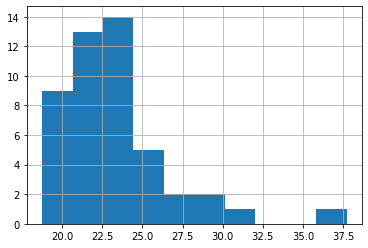

In [33]:
compact_cars = df[df['class'] == 'compact'].avg_eff
compact_cars.hist()
# not normal distribution

In [46]:
len(all_cars), len(compact_cars)

(234, 47)

In [36]:
#5
# H0: compact cars are not more fuel efficient than other cars
# H1: compact cars are more fuel efficient than other cars
# Use 1-sided t-test
alpha = 0.05
t, p = stats.ttest_ind(compact_cars, all_cars)
t, p/2, alpha
# t and p values show that we should reject H0
# compact cars are more fuel efficient than other cars

(5.193903224387407, 1.9888764369810984e-07, 0.05)

In [39]:
#5
# Do manual cars get better gas mileage than automatic cars?
df['transmission'] = np.where(df.trans.str.contains('auto'), 'auto', 'manual')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,avg_eff,is_compact,transmission
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,22.212766,True,auto
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,24.360000,True,manual
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,24.313725,True,manual
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,24.705882,True,auto
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,19.809524,True,auto


In [42]:
df.groupby('transmission').avg_eff.mean()

transmission
auto      18.583200
manual    21.629229
Name: avg_eff, dtype: float64

<AxesSubplot:xlabel='transmission'>

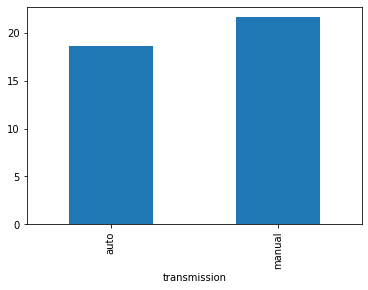

In [43]:
df.groupby('transmission').avg_eff.mean().plot.bar()

<AxesSubplot:>

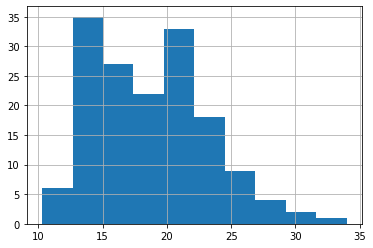

In [47]:
#5
# H0: manual cars do not get better mileage than other cars
# H1: manual cars do get better mileage than other cars
# 1-tailed t-test is needed

auto_cars = df[df['trans'].str.contains('auto')].avg_eff
auto_cars.hist()

<AxesSubplot:>

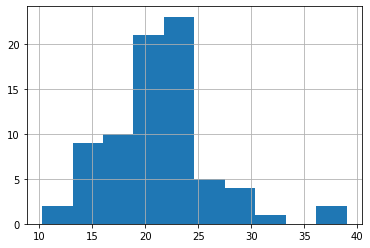

In [49]:
man_cars = df[df['trans'].str.contains('manual')].avg_eff
man_cars.hist()

In [52]:
len(man_cars), len(auto_cars)

(77, 157)

In [53]:
man_cars.var(), auto_cars.var()

(25.665633639828275, 20.428279095002054)

In [54]:
stats.levene(man_cars, auto_cars)
# p values shows that variances are not significantly different

LeveneResult(statistic=0.013901207169738269, pvalue=0.9062462281015493)

In [55]:
alpha = 0.05
t, p = stats.ttest_ind(man_cars, auto_cars)
t, p/2, alpha

(4.652577547151351, 2.7552323050220026e-06, 0.05)

In [58]:
print('is p/2 < alpha?', p/2 < alpha)
print('is t > 0?', t > 0)

is p/2 < alpha? True
is t > 0? True


In [59]:
if (p/2 < alpha) & (t > 0):
    print('we reject the null hypothesis')
else:
    print('we fail to reject the null hypothesis')

we reject the null hypothesis


In [ ]:
# Correlation testing
#1
# Use the telco_churn data.
# Does tenure correlate with monthly charges? 
# Total charges? 
#What happens if you control for phone and internet service?


In [27]:
df = pd.read_csv('telco_storytelling.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,...,has_internet,has_phone_and_internet,partner_dependents,start_date,average_monthly_charges,validate_monthly_charges,contract_type_desc,phone_type_desc,internet_type_desc,payment_is_automatic
0,0,0,1371-DWPAZ,Female,0,Yes,Yes,0,1,2,...,True,False,3,20210727,0.0,False,2 Year,No Phone Service,DSL,True
1,1,1,2520-SGTTA,Female,0,Yes,Yes,1,0,2,...,False,False,3,20210727,0.0,False,2 Year,One Line,No Internet Service,False
2,2,2,2775-SEFEE,Male,0,No,Yes,2,1,2,...,True,True,2,20210727,0.0,False,2 Year,Two or More Lines,DSL,True
3,3,3,2923-ARZLG,Male,0,Yes,Yes,1,0,1,...,False,False,3,20210727,0.0,False,1 Year,One Line,No Internet Service,False
4,4,4,3115-CZMZD,Male,0,No,Yes,1,0,2,...,False,False,2,20210727,0.0,False,2 Year,One Line,No Internet Service,False


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                7043 non-null   int64  
 1   Unnamed: 0.1              7043 non-null   int64  
 2   customer_id               7043 non-null   object 
 3   gender                    7043 non-null   object 
 4   is_senior_citizen         7043 non-null   int64  
 5   partner                   7043 non-null   object 
 6   dependents                7043 non-null   object 
 7   phone_service             7043 non-null   int64  
 8   internet_service          7043 non-null   int64  
 9   contract_type             7043 non-null   int64  
 10  payment_type              7043 non-null   object 
 11  monthly_charges           7043 non-null   float64
 12  total_charges             7032 non-null   float64
 13  churn                     7043 non-null   object 
 14  tenure  

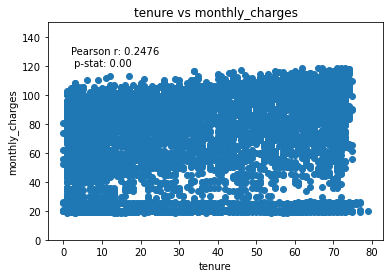

In [29]:
#1
# Does tenure correlate with monthly charges? 
# H0: tenure does not correlate with monthly charges
# Ha: tenure does correlate with monthly charges

x = df.tenure
y = df.monthly_charges
plt.scatter(x,y)
plt.xlabel('tenure')
plt.ylabel('monthly_charges')
plt.title('tenure vs monthly_charges')
plt.ylim(0, 150)
plt.annotate(f'Pearson r: {stats.pearsonr(x,y)[0]:.4f}\n p-stat: {stats.pearsonr(x, y)[1]:.2f}', xy = (2, 120))
plt.show()             

In [7]:
stats.pearsonr(x, y)

(0.24763344469188245, 6.724532823869006e-99)

<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

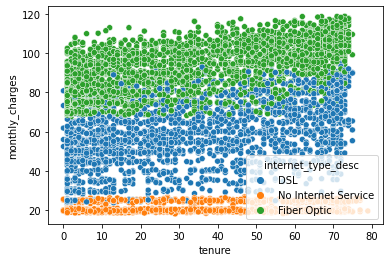

In [13]:
sns.scatterplot(x='tenure', y='monthly_charges', data= df, hue= 'internet_type_desc')

In [14]:
corr, p = stats.pearsonr(x, y)
corr, p

(0.24763344469188245, 6.724532823869006e-99)

In [ ]:
# the r is not very high but indicates some positive correlation
# p is less than alpha
# we do not reject H0
# we found no linear correlation between tenure and monthly charges

In [26]:
# Total charges? 
# H0: tenure does not correlate with total charges
# Ha: tenure does correlate with total charges

# the data must be cleaned because NaN or nulls will break the pearson function
cleaned = df[df['total_charges'] > 0]
cleaned.head()

,Unnamed: 0,Unnamed: 0.1,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,...,has_internet,has_phone_and_internet,partner_dependents,start_date,average_monthly_charges,validate_monthly_charges,contract_type_desc,phone_type_desc,internet_type_desc,payment_is_automatic
11,11,11,0002-ORFBO,Female,0,Yes,Yes,1,1,1,...,True,True,3,20201024,65.6,True,1 Year,One Line,DSL,False
12,12,12,0003-MKNFE,Male,0,No,No,2,1,0,...,True,True,0,20201024,59.9,True,Month-to-Month,Two or More Lines,DSL,False
13,13,13,0004-TLHLJ,Male,0,No,No,1,2,0,...,True,True,0,20210402,73.9,True,Month-to-Month,One Line,Fiber Optic,False
14,14,14,0011-IGKFF,Male,1,Yes,No,1,2,0,...,True,True,1,20200707,98.0,True,Month-to-Month,One Line,Fiber Optic,False
15,15,15,0013-EXCHZ,Female,1,Yes,No,1,2,0,...,True,True,1,20210421,83.9,True,Month-to-Month,One Line,Fiber Optic,False


In [30]:
cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 11 to 7042
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                7032 non-null   int64  
 1   Unnamed: 0.1              7032 non-null   int64  
 2   customer_id               7032 non-null   object 
 3   gender                    7032 non-null   object 
 4   is_senior_citizen         7032 non-null   int64  
 5   partner                   7032 non-null   object 
 6   dependents                7032 non-null   object 
 7   phone_service             7032 non-null   int64  
 8   internet_service          7032 non-null   int64  
 9   contract_type             7032 non-null   int64  
 10  payment_type              7032 non-null   object 
 11  monthly_charges           7032 non-null   float64
 12  total_charges             7032 non-null   float64
 13  churn                     7032 non-null   object 
 14  tenure 

<AxesSubplot:xlabel='tenure', ylabel='total_charges'>

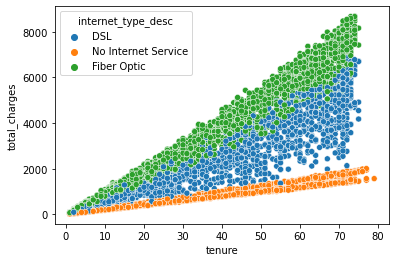

In [19]:
alpha = 0.05
x = cleaned.tenure
y = cleaned.total_charges
sns.scatterplot(x='tenure', y='total_charges', data=df, hue='internet_type_desc')

In [20]:
corr, p = stats.pearsonr(x, y)
corr, p
# the test stat indicates positive correlation
# the p stat is lower than alpha, so we should reject H0
# we accept Ha
# there is positve correlation between tenure and total_charges

(0.8262413164764268, 0.0)

In [23]:
#1
#What happens if you control for phone and internet service?

# customers without phone service
no_phone = cleaned[(cleaned['phone_type_desc'] == 'No Phone Service')].total_charges
no_phone

21      2460.55
25      2560.10
27      1993.20
30        25.10
36        30.50
         ...   
6979    3517.90
6980      25.05
6996     552.10
7016    4263.40
7042    3707.60
Name: total_charges, Length: 680, dtype: float64

In [32]:
tenure_no_ph = cleaned[(cleaned['phone_type_desc'] == 'No Phone Service')].tenure
tenure_no_ph

21      54
25      57
27      33
30       1
36       1
        ..
6979    66
6980     1
6996    11
7016    70
7042    63
Name: tenure, Length: 680, dtype: int64

Text(0, 0.5, 'total charges without phone')

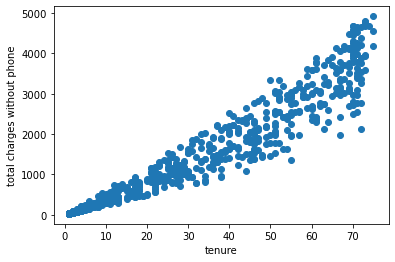

In [35]:
x = tenure_no_ph
y = no_phone
plt.scatter(x, y)
plt.xlabel('tenure')
plt.ylabel('total charges without phone')

In [37]:
corr, p = stats.pearsonr(x, y)
corr, p
# test stat shows strong positive correlation and p stat is less than alpha
# we reject H0
# there is correlation

(0.9541384580311343, 0.0)

In [46]:
# customers with phone service
with_phone = cleaned[cleaned['phone_type_desc'] != 'No Phone Service'].total_charges
with_phone

11       593.30
12       542.40
13       280.85
14      1237.85
15       267.40
         ...   
7037      85.50
7038     742.90
7039    1873.70
7040      92.75
7041    4627.65
Name: total_charges, Length: 6352, dtype: float64

In [48]:
tenure_w_phone = cleaned[(cleaned['phone_type_desc'] != 'No Phone Service')].tenure
tenure_w_phone

11       9
12       9
13       4
14      13
15       3
        ..
7037     4
7038    13
7039    22
7040     2
7041    68
Name: tenure, Length: 6352, dtype: int64

Text(0, 0.5, 'total charges with phone')

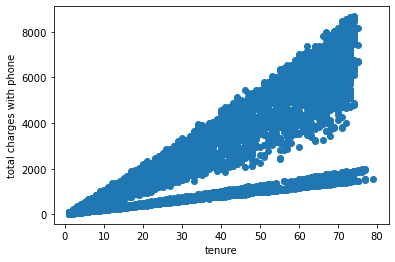

In [49]:
x = tenure_w_phone
y = with_phone
plt.scatter(x, y)
plt.xlabel('tenure')
plt.ylabel('total charges with phone')

In [50]:
corr, p = stats.pearsonr(x, y)
corr, p
# test stat indicates positive correlation and p stat is less than alpha
# we reject H0
# there is correlation

(0.8302463707361658, 0.0)

In [57]:
# controlling for internet service type
cleaned['internet'] = np.where(cleaned.internet_service != 0, True, False)
cleaned

,Unnamed: 0,Unnamed: 0.1,customer_id,gender,is_senior_citizen,partner,dependents,phone_service,internet_service,contract_type,...,has_phone_and_internet,partner_dependents,start_date,average_monthly_charges,validate_monthly_charges,contract_type_desc,phone_type_desc,internet_type_desc,payment_is_automatic,internet
11,11,11,0002-ORFBO,Female,0,Yes,Yes,1,1,1,...,True,3,20201024,65.60,True,1 Year,One Line,DSL,False,True
12,12,12,0003-MKNFE,Male,0,No,No,2,1,0,...,True,0,20201024,59.90,True,Month-to-Month,Two or More Lines,DSL,False,True
13,13,13,0004-TLHLJ,Male,0,No,No,1,2,0,...,True,0,20210402,73.90,True,Month-to-Month,One Line,Fiber Optic,False,True
14,14,14,0011-IGKFF,Male,1,Yes,No,1,2,0,...,True,1,20200707,98.00,True,Month-to-Month,One Line,Fiber Optic,False,True
15,15,15,0013-EXCHZ,Female,1,Yes,No,1,2,0,...,True,1,20210421,83.90,True,Month-to-Month,One Line,Fiber Optic,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,7038,9987-LUTYD,Female,0,No,No,1,1,1,...,True,0,20200612,55.15,True,1 Year,One Line,DSL,False,True
7039,7039,7039,9992-RRAMN,Male,0,Yes,No,2,2,0,...,True,1,20190926,85.10,True,Month-to-Month,Two or More Lines,Fiber Optic,False,True
7040,7040,7040,9992-UJOEL,Male,0,No,No,1,1,0,...,True,0,20210531,50.30,True,Month-to-Month,One Line,DSL,False,True
7041,7041,7041,9993-LHIEB,Male,0,Yes,Yes,1,1,2,...,True,3,20151121,67.85,True,2 Year,One Line,DSL,False,True


In [59]:
no_internet_tc = cleaned[cleaned['internet'] == False].total_charges
no_internet_tc.shape

(1520,)

In [61]:
tenure_no_internet = cleaned[cleaned['internet'] == False].tenure
tenure_no_internet.shape

(1520,)

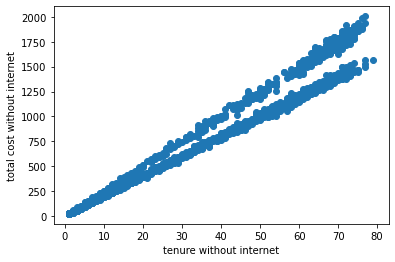

In [62]:
alpha = 0.05
x = tenure_no_internet
y = no_internet_tc
plt.scatter(x, y)
plt.xlabel('tenure without internet')
plt.ylabel('total cost without internet')
plt.show()

In [63]:
corr, p = stats.pearsonr(x, y)
corr, p
# test stat shows positive correlation and p stat is less than alpha
# we reject H0

(0.9842322211133386, 0.0)

In [60]:
internet_tc = cleaned[cleaned['internet'] == True].total_charges
internet_tc.shape

(5512,)

In [64]:
tenure_w_internet = cleaned[cleaned['internet'] == True].tenure
tenure_w_internet.shape

(5512,)

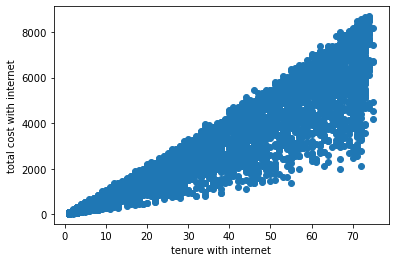

In [65]:
alpha = 0.05
x= tenure_w_internet
y= internet_tc
plt.scatter(x,y)
plt.xlabel('tenure with internet')
plt.ylabel('total cost with internet')
plt.show()

In [66]:
corr, p = stats.pearsonr(x,y)
corr, p
# test stat shows positive correlation and p stat is less than alpha, so we reject H0
# there is correlation

(0.93264393080342, 0.0)

In [71]:
#2
# Use the employees database.

# Is there a relationship between how long an employee has been with the company 
# and their salary?

# Is there a relationship between how long an employee has been with the company 
# and the number of titles they have had?

from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/employees'

query = """
select *, datediff(now(), e.hire_date) as 'time_at_job'
from employees e
join salaries s using(emp_no)
join titles t using(emp_no)
where s.to_date > now()
"""

e_df = pd.read_sql(query, url)
e_df

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,title,from_date,to_date,time_at_job
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01,Senior Engineer,1986-06-26,9999-01-01,12829
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01,Staff,1996-08-03,9999-01-01,13046
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01,Senior Engineer,1995-12-03,9999-01-01,12766
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,Engineer,1986-12-01,1995-12-01,12671
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,Senior Engineer,1995-12-01,9999-01-01,12671
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371238,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,83441,2001-08-26,9999-01-01,Engineer,1987-08-30,1992-08-29,12895
371239,499997,1961-08-03,Berhard,Lenart,M,1986-04-21,83441,2001-08-26,9999-01-01,Senior Engineer,1992-08-29,9999-01-01,12895
371240,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,55003,2001-12-25,9999-01-01,Senior Staff,1998-12-27,9999-01-01,10163
371241,499998,1956-09-05,Patricia,Breugel,M,1993-10-13,55003,2001-12-25,9999-01-01,Staff,1993-12-27,1998-12-27,10163


<function matplotlib.pyplot.show(close=None, block=None)>

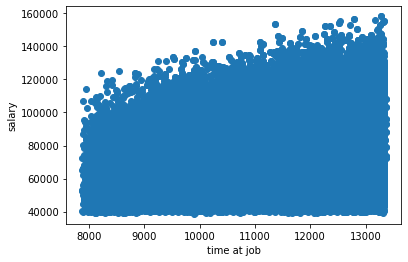

In [73]:
# Is there a relationship between how long an employee has been with the company 
# and their salary?

# H0: there is not a correlation between time at company and salary
# Ha: there is a correlation between time at company and salary
x= e_df.time_at_job
y= e_df.salary

plt.scatter(x,y)
plt.xlabel('time at job')
plt.ylabel('salary')
plt.show

In [74]:
corr, p = stats.pearsonr(x,y)
corr, p
# test stat shows some positive correlation and p stat is less than alpha
# we reject H0
# this indicates that there is some positive correlation between time at job and salary

(0.30728190932146726, 0.0)

In [77]:
# Is there a relationship between how long an employee has been with the company 
# and the number of titles they have had?

# H0: there is no correlation between time at job and number of titles held
# Ha: there is a correlation between time at job and number of titles held

alpha = 0.05

num_titles = e_df.groupby('emp_no').count()[['title']].rename(columns={'title': 'title_count'})
num_titles

,title_count
emp_no,
10001,1
10002,1
10003,1
10004,2
10005,2
...,...
499995,1
499996,2
499997,2


In [78]:
e_df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,title,from_date,to_date,time_at_job
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01,Senior Engineer,1986-06-26,9999-01-01,12829
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01,Staff,1996-08-03,9999-01-01,13046
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01,Senior Engineer,1995-12-03,9999-01-01,12766
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,Engineer,1986-12-01,1995-12-01,12671
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,Senior Engineer,1995-12-01,9999-01-01,12671


In [79]:
e_t_merged = pd.merge(e_df, num_titles, how = 'left', on= 'emp_no')
e_t_merged.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,title,from_date,to_date,time_at_job,title_count
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,88958,2002-06-22,9999-01-01,Senior Engineer,1986-06-26,9999-01-01,12829,1
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,72527,2001-08-02,9999-01-01,Staff,1996-08-03,9999-01-01,13046,1
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,43311,2001-12-01,9999-01-01,Senior Engineer,1995-12-03,9999-01-01,12766,1
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,Engineer,1986-12-01,1995-12-01,12671,2
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,74057,2001-11-27,9999-01-01,Senior Engineer,1995-12-01,9999-01-01,12671,2


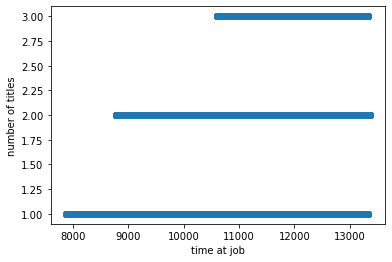

In [80]:
# assign x and y
x = e_t_merged.time_at_job
y = e_t_merged.title_count

plt.scatter(x,y)
plt.xlabel('time at job')
plt.ylabel('number of titles')
plt.show()

In [81]:
corr, p = stats.pearsonr(x,y)
corr, p
# test stat shows some positive correlation and p stat is less than alpha
# reject H0
# there is positve correlation between time at job and number of titles

(0.2874004366228011, 0.0)

In [82]:
#3
# Use the sleepstudy data. Is there a relationship between days and reaction time?

from pydataset import data

s_df = data('sleepstudy')
s_df

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308
...,...,...,...
176,329.6076,5,372
177,334.4818,6,372
178,343.2199,7,372
179,369.1417,8,372


In [83]:
data('sleepstudy', show_doc = True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [84]:
s_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


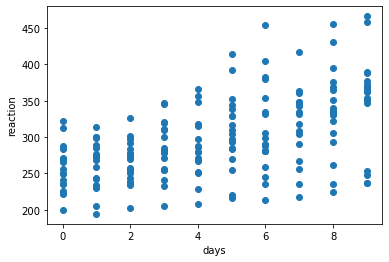

In [85]:
# assign x and y
x = s_df.Days
y = s_df.Reaction
plt.scatter(x,y)
plt.xlabel('days')
plt.ylabel('reaction')
plt.show()

In [86]:
corr, p = stats.pearsonr(x,y)
corr, p
# test stat shows some positive correlation and p stat is lower than alpha
# reject H0
# there is correlation between sleep and reaction

(0.5352302262650253, 9.894096322214812e-15)

In [3]:
# Chi Square section
# 1
# Use the following contingency table to help answer the question 
# of whether using a macbook and being a codeup student are independent of each other.

# H0: there is no association between using a macbook and being a codeup student
# Ha: there is a association between using a macbook and being a codeup student

# create the contingency table
index = ['Uses a MacBook', "Doesn't Use a Macbook"]
columns = ['Codeup Student', 'Not Codeup Student']
observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns=columns)
observed

,Codeup Student,Not Codeup Student
Uses a MacBook,49,20
Doesn't Use a Macbook,1,30


In [5]:
alpha = 0.05
chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}') # ':.4f' means that chi2 will be rounded to 4 decimal places
print(f'p.    = {p:.4f}')

Observed
[[49 20]
 [ 1 30]]
---
Expected

[[34 34]
 [15 15]]
---

chi^2 = 36.6526
p.    = 0.0000


In [6]:
null_hypothesis =  'there is no association between using a macbook and being a codeup student'
alpha = 0.05
if p < alpha:
    print('We reject H0 that:\n', null_hypothesis)
else:
    print('We fail to reject H0 ')

We reject H0 that:
 there is no association between using a macbook and being a codeup student


In [7]:
#2
# Choose another 2 categorical variables from the mpg dataset and perform a chi2
# contingency table test with them. Be sure to state your null and alternative hypotheses.

from pydataset import data
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [8]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 1 to 234
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  class         234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 21.9+ KB


In [9]:
observed = pd.crosstab(mpg.model, mpg['class'])
observed

class,2seater,compact,midsize,minivan,pickup,subcompact,suv
model,,,,,,,
4runner 4wd,0,0,0,0,0,0,6
a4,0,7,0,0,0,0,0
a4 quattro,0,8,0,0,0,0,0
a6 quattro,0,0,3,0,0,0,0
altima,0,2,4,0,0,0,0
c1500 suburban 2wd,0,0,0,0,0,0,5
camry,0,0,7,0,0,0,0
camry solara,0,7,0,0,0,0,0
caravan 2wd,0,0,0,11,0,0,0


In [10]:
# H0: there is no association between model and class
# Ha: there is a association between model and class
alpha = 0.05

chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}') # ':.4f' means that chi2 will be rounded to 4 decimal places
print(f'p.    = {p:.4f}')

Observed
[[ 0  0  0  0  0  0  6]
 [ 0  7  0  0  0  0  0]
 [ 0  8  0  0  0  0  0]
 [ 0  0  3  0  0  0  0]
 [ 0  2  4  0  0  0  0]
 [ 0  0  0  0  0  0  5]
 [ 0  0  7  0  0  0  0]
 [ 0  7  0  0  0  0  0]
 [ 0  0  0 11  0  0  0]
 [ 0  0  0  0  0  9  0]
 [ 0  5  0  0  0  0  0]
 [ 5  0  0  0  0  0  0]
 [ 0  0  0  0  9  0  0]
 [ 0  0  0  0  0  0  7]
 [ 0  0  0  0  0  0  3]
 [ 0  0  0  0  0  0  6]
 [ 0  0  0  0  7  0  0]
 [ 0  0  0  0  0  0  6]
 [ 0  0  0  0  0  0  8]
 [ 0  0  5  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  4  0  0  0  4  0]
 [ 0  9  0  0  0  0  0]
 [ 0  0  0  0  0  0  4]
 [ 0  0  0  0  0  0  2]
 [ 0  0  5  0  0  0  0]
 [ 0  0  3  0  0  0  0]
 [ 0  0  0  0  0  0  4]
 [ 0  0  0  0  0  9  0]
 [ 0  0  0  0  0  0  3]
 [ 0  0  0  0  0  6  0]
 [ 0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0  4]
 [ 0  0  0  0 10  0  0]
 [ 0  0  0  0  0  0  4]
 [ 0  0  7  0  0  0  0]
 [ 0  0  0  0  0  7  0]
 [ 0  0  0  0  7  0  0]]
---
Expected

[[0 1 1 0 0 0 1]
 [0 1 1 0 0 1 1]
 [0 1 1 0 1 1 2]
 [0 0 0 0 0 0

In [11]:
null_hypothesis =  'there is no association between model and class'
alpha = 0.05
if p < alpha:
    print('We reject H0 that:\n', null_hypothesis)
else:
    print('We fail to reject H0 ')

We reject H0 that:
 there is no association between model and class


In [23]:
#3
# Use the data from the employees database to answer these questions:

# Is an employee's gender independent of whether an employee works in sales or marketing? 
#(only look at current employees)

# Is an employee's gender independent of whether or not they are or have been a manager?

from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/employees'

query = """
select emp_no, gender, dept_no, dept_name
from employees e
join salaries s using(emp_no)
join dept_emp de using(emp_no)
join departments d using(dept_no)
where s.to_date > now() and
d.dept_name in ('Sales', 'Marketing');
"""

e_df = pd.read_sql(query, url)
e_df.head()

,emp_no,gender,dept_no,dept_name
0,10017,F,d001,Marketing
1,10058,M,d001,Marketing
2,10140,F,d001,Marketing
3,10228,F,d001,Marketing
4,10239,F,d001,Marketing


In [25]:
#3
# Is an employee's gender independent of whether an employee works in sales or marketing? 
# (only look at current employees)

# H0: there is no association between gender and department
# Ha: there is an association between gender and department

observed = pd.crosstab(e_df.gender, e_df.dept_name)
observed

dept_name,Marketing,Sales
gender,,
F,6429,16698
M,9823,25302


In [27]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

alpha = 0.05

chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}') # ':.4f' means that chi2 will be rounded to 4 decimal places
print(f'p.    = {p:.4f}')

null_hypothesis =  'there is no association between gender and department'
alpha = 0.05
if p < alpha:
    print('We reject H0 that:\n', null_hypothesis)
else:
    print('We fail to reject H0 ')

Observed
[[ 6429 16698]
 [ 9823 25302]]
---
Expected

[[ 6452 16674]
 [ 9799 25325]]
---

chi^2 = 0.1855
p.    = 0.6667
We fail to reject H0 


In [28]:
#3
# Is an employee's gender independent of whether or not they are or have been a manager?

url = f'mysql+pymysql://{user}:{password}@{host}/employees'

query = """
select emp_no, gender, from_date
from employees e
join dept_manager dm using(emp_no);
"""

e_df = pd.read_sql(query, url)
# H0: there is no association between gender and department
# Ha: there is an association between gender and departmente_df.head()

,emp_no,gender,from_date
0,110022,M,1985-01-01
1,110039,M,1991-10-01
2,110085,M,1985-01-01
3,110114,F,1989-12-17
4,110183,F,1985-01-01


In [30]:
# H0: there is no association between gender and being a department manager
# Ha: there is an association between gender and being a department manager

observed = pd.crosstab(e_df.gender, e_df.from_date)
observed

from_date,1985-01-01,1988-09-09,1988-10-17,1989-05-06,1989-12-17,1991-03-07,1991-04-08,1991-09-12,1991-10-01,1992-03-21,1992-04-25,1992-08-02,1992-09-08,1994-06-28,1996-01-03,1996-08-30
gender,,,,,,,,,,,,,,,,
F,4,1,1,1,1,0,1,1,0,1,1,0,1,0,0,0
M,5,0,0,0,0,1,0,0,1,0,0,1,0,1,1,1


In [31]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}') # ':.4f' means that chi2 will be rounded to 4 decimal places
print(f'p.    = {p:.4f}')

null_hypothesis =  'there is no association between gender and being a department manager'
alpha = 0.05
if p < alpha:
    print('We reject H0 that:\n', null_hypothesis)
else:
    print('We fail to reject H0 ')

Observed
[[4 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0]
 [5 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1]]
---
Expected

[[4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
---

chi^2 = 15.0490
p.    = 0.4479
We fail to reject H0 
